In [84]:
import os 
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# print(f'pandas version: {pd.__version__}')
# print(f'numpy version: {np.__version__}')
# print(f'json version: {json.__version__}')

In [85]:
base_path = "./UserData/"

results = {}
amount_of_files = 0

# Loop over all the files
for dir in os.listdir(base_path):
    dir_path = base_path + dir

    # Only check the directories
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            file_path = dir_path + "/" + file

            # Only check the files
            if not os.path.isdir(file_path):
                amount_of_files += 1
                log_path = dir_path + "/logs"
                
                # Get the excel file and convert to an array with 0, 0.5 and 1
                # representing neutral, slight smile and smile
                df = pd.read_excel(file_path)

                # Remove first joke because users smile for no reason
                result_array = np.where(df.iloc[4:, 1:4] == 'x')[1] / 2
                for log in os.listdir(log_path):
                    # Get the corresponding log file and convert to an array
                    # with numbers representing the smile degree
                    if file[2:-5] in log:
                        with open(log_path + "/" + log, "r") as log_file:
                            json_log = json.load(log_file)
                            smile_degree_array = [entry['smileDegree'] for entry in json_log]
                results[file[:-5]] = [result_array, smile_degree_array]
                
print(f"Amount of files: {amount_of_files}")

Amount of files: 32


### General MSE comparison

In [86]:
MSE = 0
MSE_A = 0
MSE_B = 0
length = 0
length_A = 0
length_B = 0

for key, values in results.items():
    min_len = min(len(values[0]), len(values[1]))
    MSE += sum(values[0][:min_len] - values[1][:min_len])
    length += min_len
    if key[-1] == "A":
        MSE_A += sum(values[0][:min_len] - values[1][:min_len])
        length_A += min_len
    elif key[-1] == "B":
        MSE_B += sum(values[0][:min_len] - values[1][:min_len])
        length_B += min_len
        
MSE_A /= length_A
MSE_B /= length_B
MSE /= length

print(f"Total MSE \t = {MSE}")
print(f"MSE A \t\t = {MSE_A}")
print(f"MSE B \t\t = {MSE_B}")

Total MSE 	 = -0.13574887791096102
MSE A 		 = -0.13700260860083177
MSE B 		 = -0.13432084295432428


### Average happiness

In [112]:
happiness_manual = 0
happiness_manual_A = 0
happiness_manual_B = 0
happiness_logs = 0
happiness_logs_A = 0
happiness_logs_B = 0
length = 0
length_A = 0
length_B = 0

array_A = []
array_B = []

for key, values in results.items():
    if int(key.split("_")[0]) < 9:  # Lena
    # if int(key.split("_")[0]:) >= 9 and int(key.split("_")[0]) < 17:  # Jens
    # if True:  # Default
        min_len = min(len(values[0]), len(values[1]))
        happiness_manual += sum(values[0][:min_len])
        happiness_logs += sum(values[1][:min_len])
        length += min_len
        if key[-1] == "A":
            happiness_manual_A += sum(values[0][:min_len])
            happiness_logs_A += sum(values[1][:min_len])
            length_A += min_len
            array_A.extend(values[1][:min_len])
        elif key[-1] == "B":
            happiness_manual_B += sum(values[0][:min_len])
            happiness_logs_B += sum(values[1][:min_len])
            length_B += min_len
            array_B.extend(values[1][:min_len])
        
happiness_manual /= length
happiness_manual_A /= length_A
happiness_manual_B /= length_B
happiness_logs /= length
happiness_logs_A /= length_A
happiness_logs_B /= length_B

print(f"Total Manual Happiness \t\t = {happiness_manual}")
print(f"Total Happiness from Logs \t = {happiness_logs}")
print(f"Manual Happiness A  \t\t = {happiness_manual_A}")
print(f"Happiness from Logs A  \t\t = {happiness_logs_A}")
print(f"Manual Happiness B \t\t = {happiness_manual_B}")
print(f"Happiness from Logs B \t\t = {happiness_logs_B}")

import scipy.stats as stats

stat, p_value = stats.mannwhitneyu(array_A, array_B, alternative = 'two-sided')

alpha = 0.05
if p_value < alpha:
    print("Significant with", p_value)
else:
    print("Not significant with", p_value)

Total Manual Happiness 		 = 0.4899749373433584
Total Happiness from Logs 	 = 0.6498691163794402
Manual Happiness A  		 = 0.4820627802690583
Happiness from Logs A  		 = 0.6548548100920237
Manual Happiness B 		 = 0.5
Happiness from Logs B 		 = 0.6435520158231554
Not significant with 0.7090210631257512


Session A and B do not have a significant difference.

The recommender system does not have a significant influence on the happiness of the user

In [125]:
import numpy as np
from scipy.stats import mannwhitneyu

# Set parameters
effect_size = 0.5  # The desired effect size
alpha = 0.05       # Significance level
power = 0.8        # Desired power

# Perform power analysis
n1 = 16  # Sample size for group 1
n2 = 16  # Sample size for group 2

# Assuming a common sample size for simplicity, you can adjust it based on your specific case
n = min(n1, n2)

# Generate random data for the example
np.random.seed(42)
group1_data = np.random.normal(0, 1, n1)
group2_data = np.random.normal(effect_size, 1, n2)

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(array_A, array_B)

# Calculate power
z_critical = np.abs(stats.norm.ppf(alpha / 2))
u_critical = z_critical / np.sqrt(2)

z_effect = (statistic - n1 * n2 / 2) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
calculated_power = stats.norm.cdf(z_effect - u_critical) + stats.norm.cdf(-z_effect - u_critical)

print(f"Mann-Whitney U test statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Calculated Power: {calculated_power}")


Mann-Whitney U test statistic: 20029.5
P-value: 0.7090210631257512
Calculated Power: 1.0


### Happiness over time for recommender system

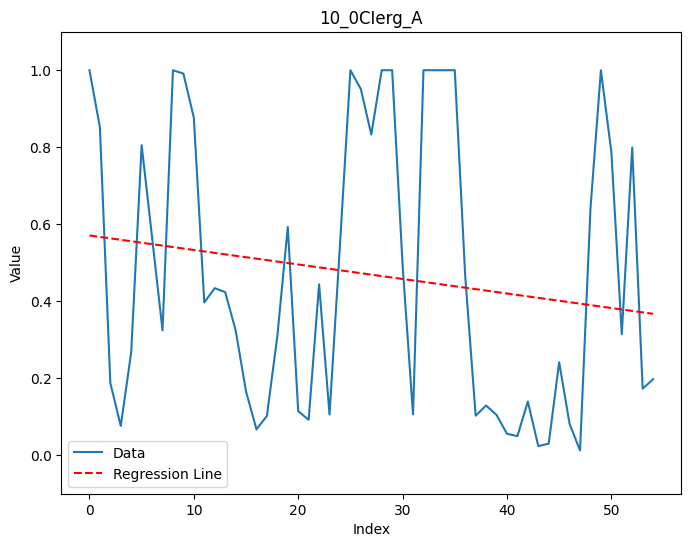

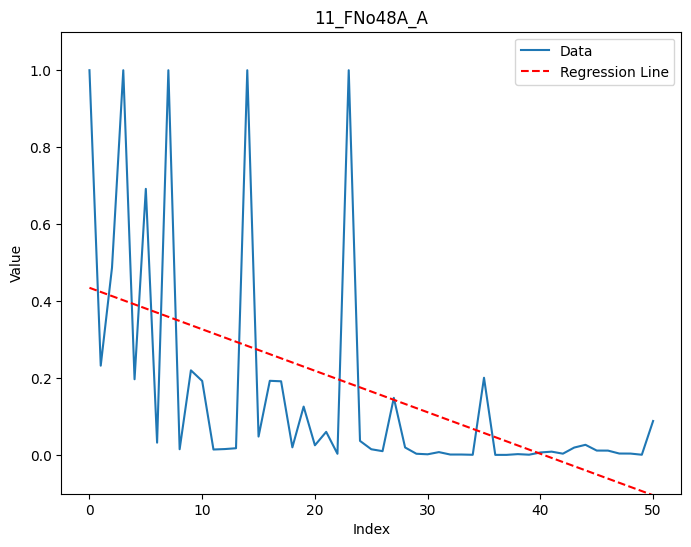

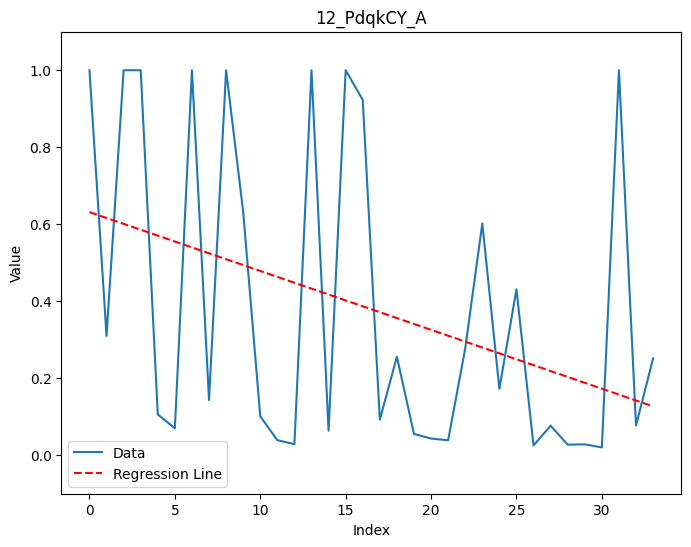

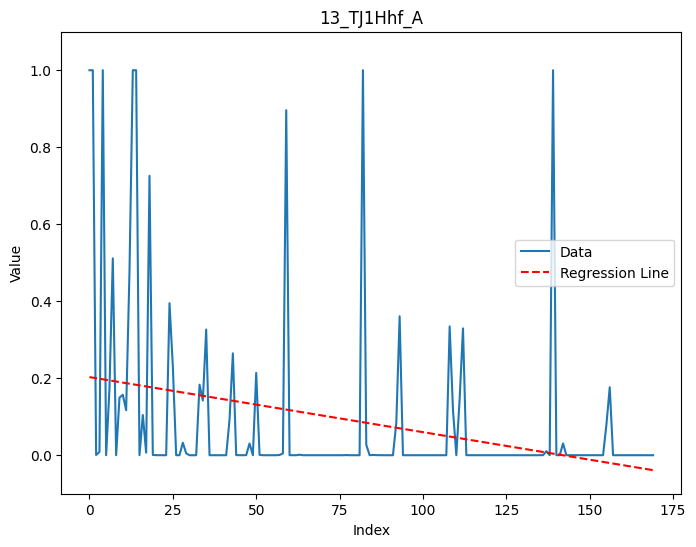

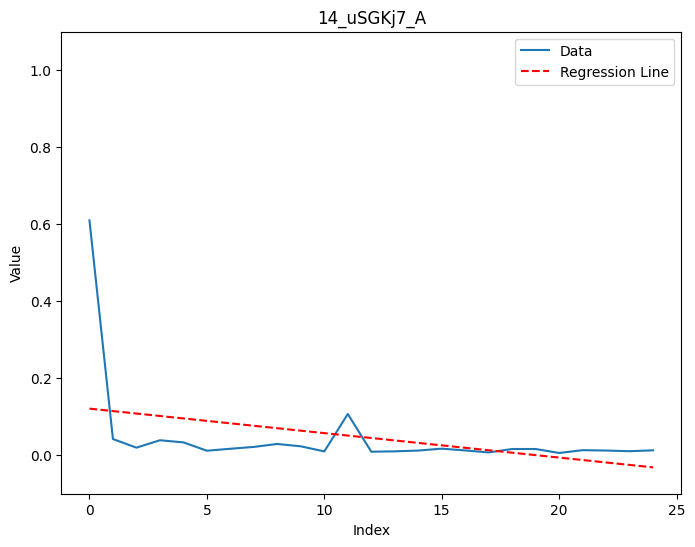

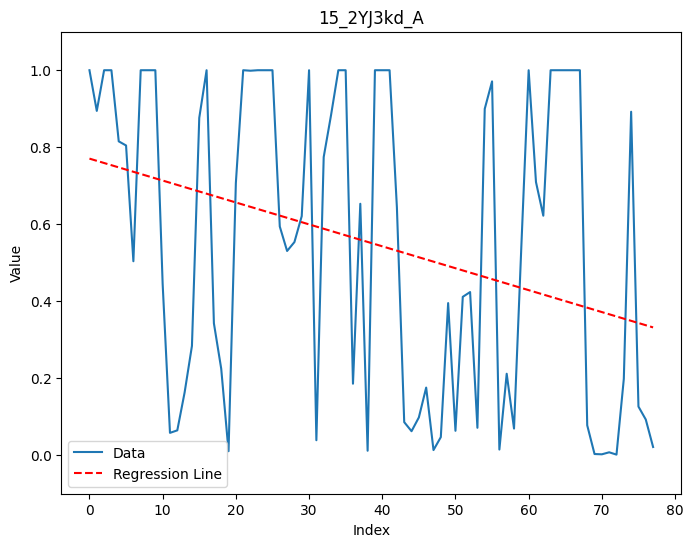

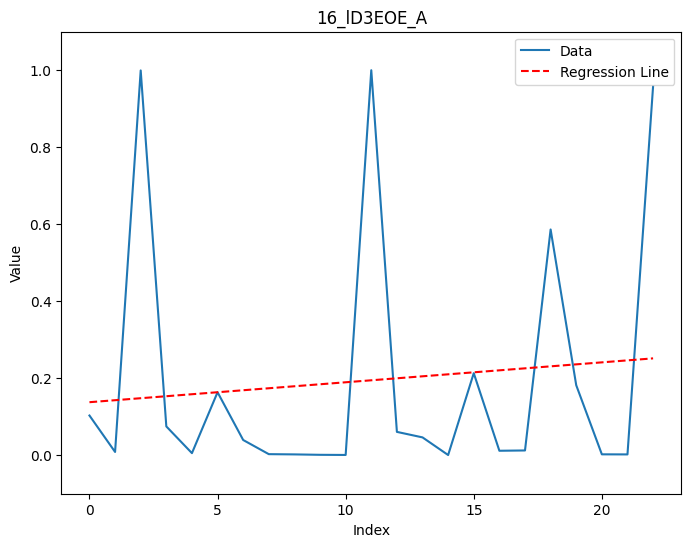

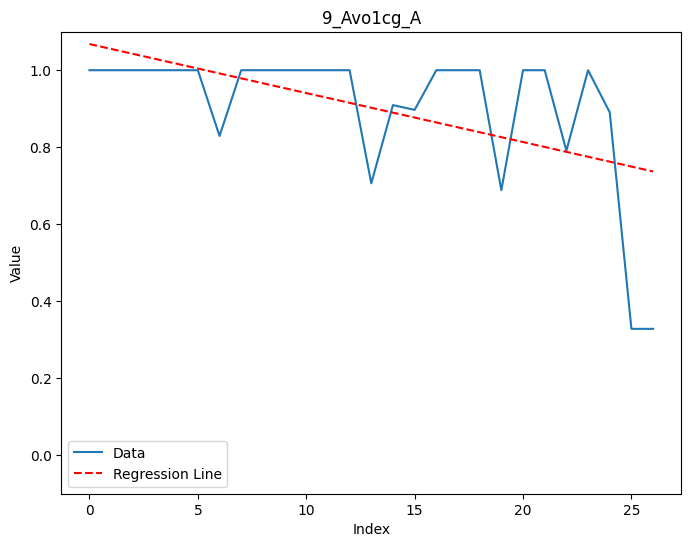

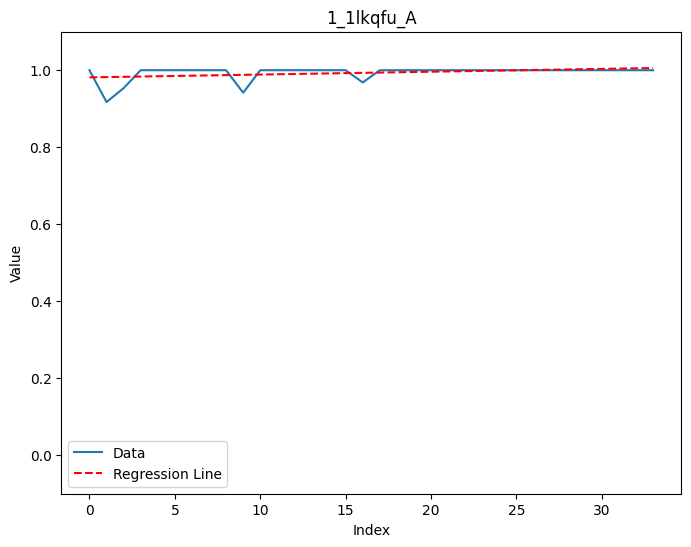

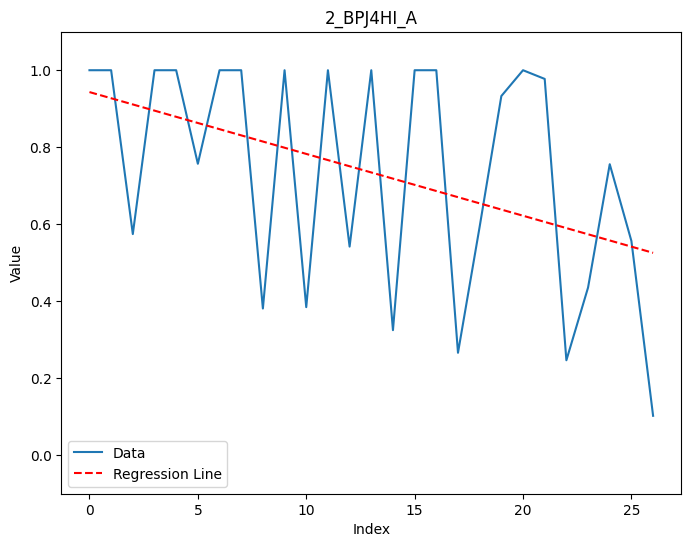

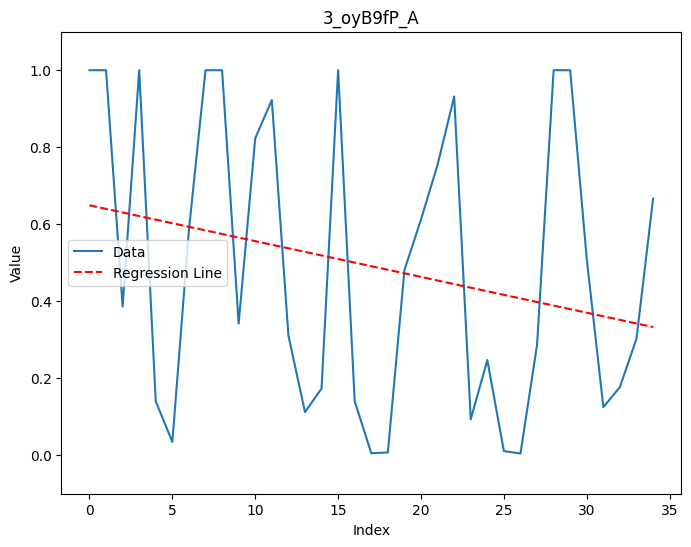

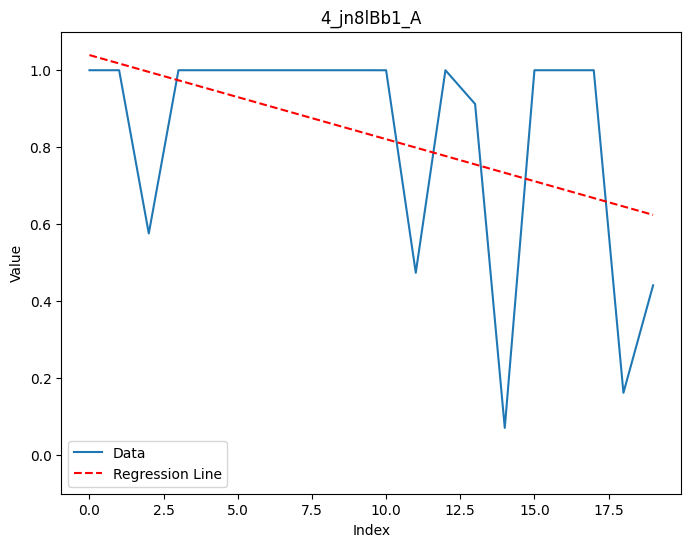

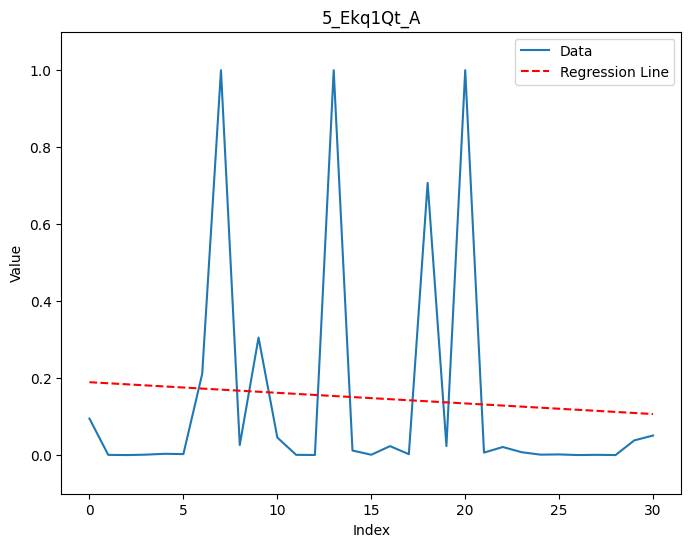

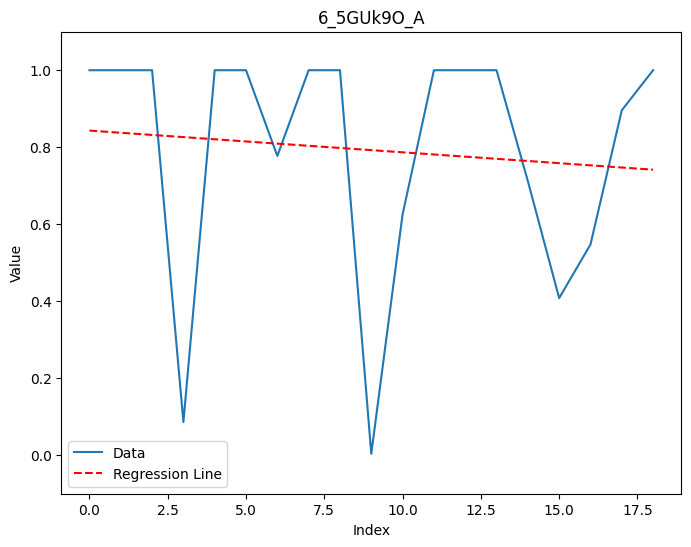

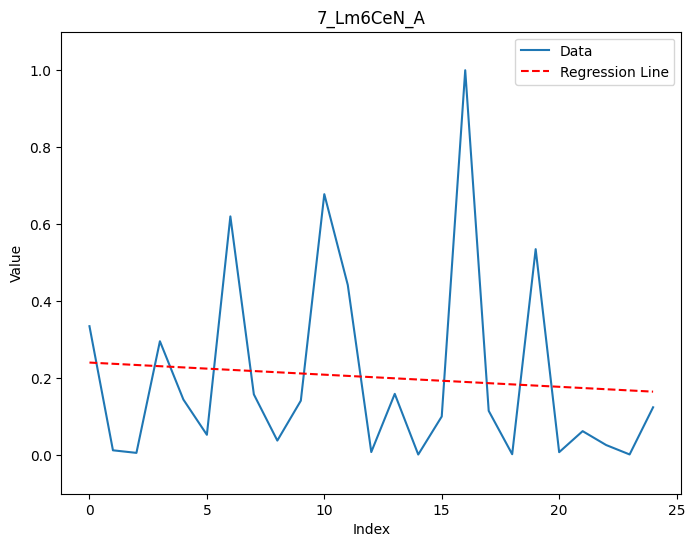

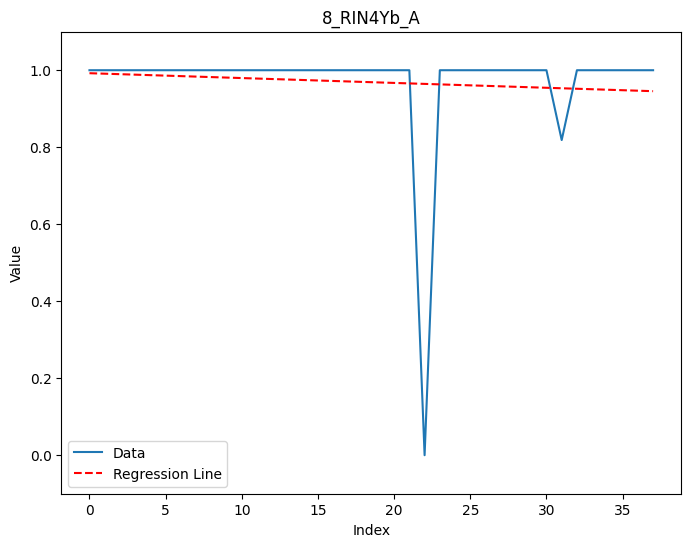

Happiness first part 	 = 0.2370959505710009
Happiness second part 	 = 0.17270077567688968
Significant with 1.8874925215279074e-05


In [88]:
happiness_first_part = 0
happiness_second_part = 0
length_A = 0

array_first = []
array_second = []

for key, values in results.items():
    if key[-1] == "A":
        min_len = min(len(values[0]), len(values[1]))
        length_A += min_len
        happiness_first_part += sum(values[1][:min_len//2])
        happiness_second_part += sum(values[1][min_len//2:min_len])
        array_first.extend(values[1][:min_len//2])
        array_second.extend(values[1][min_len//2:min_len])

        # Perform linear regression
        x_values = np.array(range(len(values[1])))
        y_values = np.array(values[1])
        coefficients = np.polyfit(x_values, y_values, 1)
        regression_line = np.polyval(coefficients, x_values)

        # Create a new figure for each key ending with 'A'
        plt.figure(figsize=(8, 6))

        # Plot the values[1], regression line, and set y-axis limits to [0, 1]
        plt.plot(x_values, y_values, label='Data')
        plt.plot(x_values, regression_line, label='Regression Line', linestyle='--', color='red')
        plt.title(key)
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.ylim(-0.1, 1.1)
        plt.legend()
        plt.show()

happiness_first_part /= length_A
happiness_second_part /= length_A

print(f"Happiness first part \t = {happiness_first_part}")
print(f"Happiness second part \t = {happiness_second_part}")

import scipy.stats as stats

stat, p_value = stats.mannwhitneyu(array_first, array_second, alternative = 'two-sided')

alpha = 0.05
if p_value < alpha:
    print("Significant with", p_value)
else:
    print("Not significant with", p_value)

Significant difference between first and second part

This means that we can extract conclusions

The first part is higher then the second part

### Statistical Tests

In [89]:
base_path = "./UserData/"
amount_of_files = 0

first = True

# Loop over all the files
for dir in os.listdir(base_path):
    dir_path = base_path + dir

    # Only check the directories
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            file_path = dir_path + "/" + file

            # Only check the files
            if not os.path.isdir(file_path):
                amount_of_files += 1
                log_path = dir_path + "/logs"
                
                # Get the excel file and convert to an array with 0, 0.5 and 1
                # representing neutral, slight smile and smile
                df = pd.read_excel(file_path)
                # Map to 0, 0.5, 1
                int_result_own = np.where(df.iloc[3:, 1:4] == 'x')[1] / 2

                # Map to 0, 0.75, 1 
                # int_result_own = np.where(int_result_own == 0.5, 0.75, int_result_own)

                for log in os.listdir(log_path):
                    # Get the corresponding log file and convert to an array
                    # with numbers representing the smile degree
                    if file[2:-5] in log:
                        with open(log_path + "/" + log, "r") as log_file:
                            json_log = json.load(log_file)
                            int_result_robot = np.array([entry['smileDegree'] for entry in json_log])
                array_length = min(len(int_result_own), len(int_result_robot))
                if first:
                    result_own_first = int_result_own[:array_length]
                    result_robot_first = int_result_robot[:array_length]
                    result_own_second = int_result_own[:array_length]
                    result_robot_second = int_result_robot[:array_length]
                    first = False
                else:
                    result_own_first = np.concatenate((result_own_first, int_result_own[:array_length]))
                    result_robot_first = np.concatenate((result_robot_first, int_result_robot[:array_length]))

# Concatenate first and second part
result_own = np.concatenate((result_own_first, result_own_second))
result_robot = np.concatenate((result_robot_first, result_robot_second))

assert(len(result_own) == len(result_robot))

In [90]:
df = pd.DataFrame({"own": result_own, "robot": result_robot})
df.agg(["count", "min", "max", "median", "mean", "skew"])

conditions = [
    df['robot'] < 0.25,
    (df['robot'] >= 0.25) & (df['robot'] <= 0.75),
    df['robot'] > 0.75
]
values = [0, 0.5, 1]

# Map 'robot' values to the desired ranges using np.select
df['robot_mapped'] = np.select(conditions, values)

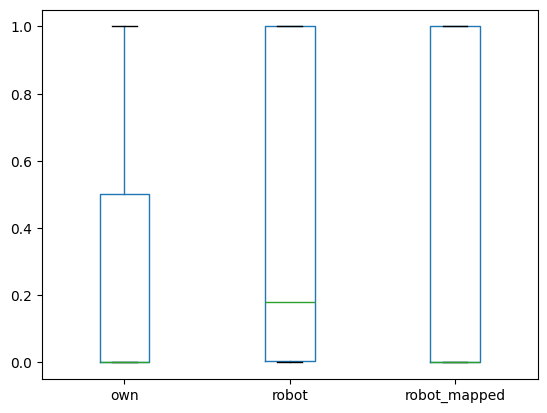

In [91]:
df.boxplot(column=['own', 'robot', 'robot_mapped'], grid=False)
plt.show()

0.6720386743545532 4.203895392974451e-45
0.7617436647415161 2.1969697453530915e-40
0.7023451328277588 1.1070257868166055e-43


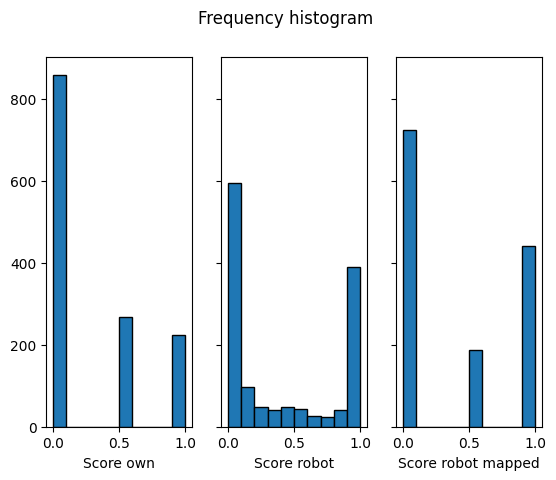

In [92]:
import scipy.stats as stats
w, pvalue = stats.shapiro(df['own'])
print(w, pvalue)

w, pvalue = stats.shapiro(df['robot'])
print(w, pvalue)

w, pvalue = stats.shapiro(df['robot_mapped'])
print(w, pvalue)

# plot histogram
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fig.suptitle('Frequency histogram')
ax1.hist(df['own'], bins=10, histtype='bar', ec='k') 
ax2.hist(df['robot'], bins=10, histtype='bar', ec='k') 
ax3.hist(df['robot_mapped'], bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Score own")
ax2.set_xlabel("Score robot")
ax3.set_xlabel("Score robot mapped")
plt.show()

In [93]:
# df_cat = df.astype(str)
# df_cat.head()

# assert type(df_cat["robot"][0]) == str

In [94]:
# from scipy.stats import chi2_contingency

# contingency_table = pd.crosstab(df_cat['own'], df_cat['robot_mapped'])

# chi2, p, dof, expected = chi2_contingency(contingency_table)
# print("Chi-squared statistic:", chi2)
# print("P-value:", p)
# print("Degrees of freedom:", dof)
# print("Expected frequencies:")
# print(expected)

In [95]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df)
    
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.7226814031600952
P-value: 0.0


Not a normal distribution

## Not a normal distribution so use Mann Whitney

In [115]:
import scipy.stats as stats

stat, p_value = stats.mannwhitneyu(x=df['own'], y=df['robot'], alternative = 'two-sided')
# stat, p_value = stats.wilcoxon(x=df['own'], y=df['robot'], alternative = 'two-sided')
alpha = 0.05
if p_value < alpha:
    print("Significant with", p_value)
else:
    print("Not significant with", p_value)

stat, p_value = stats.mannwhitneyu(x=df['own'], y=df['robot_mapped'], alternative = 'two-sided')
# stat, p_value = stats.wilcoxon(x=df['own'], y=df['robot_mapped'], alternative = 'two-sided')
alpha = 0.05
if p_value < alpha:
    print("Significant with", p_value)
else:
    print("Not significant with", p_value)

Significant with 3.1766084148950327e-102
Significant with 3.72881893005702e-23


"own" and "robot" is significantly different

Our own interpretation does not correspond to the detection of the robot

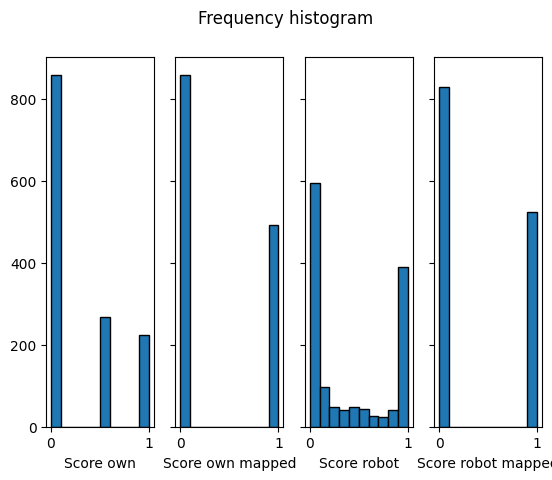

In [116]:
# Map 'robot' values to the desired ranges using np.select
df['robot_round'] = np.where(df['robot'] < 0.5, 0, 1)
df['own_round'] = np.where(df['own'] == 0.5, 1, df['own'])

# plot histogram
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
fig.suptitle('Frequency histogram')
ax1.hist(df['own'], bins=10, histtype='bar', ec='k') 
ax2.hist(df['own_round'], bins=10, histtype='bar', ec='k') 
ax3.hist(df['robot'], bins=10, histtype='bar', ec='k') 
ax4.hist(df['robot_round'], bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Score own")
ax2.set_xlabel("Score own mapped")
ax3.set_xlabel("Score robot")
ax4.set_xlabel("Score robot mapped")
plt.show()

In [117]:
import scipy.stats as stats

stat, p_value = stats.mannwhitneyu(x=df['own_round'], y=df['robot_round'], alternative = 'two-sided')
# stat, p_value = stats.wilcoxon(x=df['own_round'], y=df['robot_round'], alternative = 'two-sided')

alpha = 0.05
if p_value < alpha:
    print("Significant with", p_value)
else:
    print("Not significant with", p_value)

Not significant with 0.2185367343550274


If we compare laughing with not laughing, the "own" and "robot" is not significantly different

This means the robot is working as intended but the degrees of smiling are on a different scale so it had to be converted first. 